# Compound Poisson process
___

A conpound Poisson process $X(t)$ is a stochastic process satisfying the following:
$$ X(t) \,=\, \sum^{N(t)}_{i=0} \xi_i, \, \, t \ge 0,$$
where $N(t)$ is a Poisson process with parameter $\lambda > 0$ and $\xi_i$ are i.i.d random variables also independent of $N(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

### Example 1
Let $\xi$ be standard normally distributed.

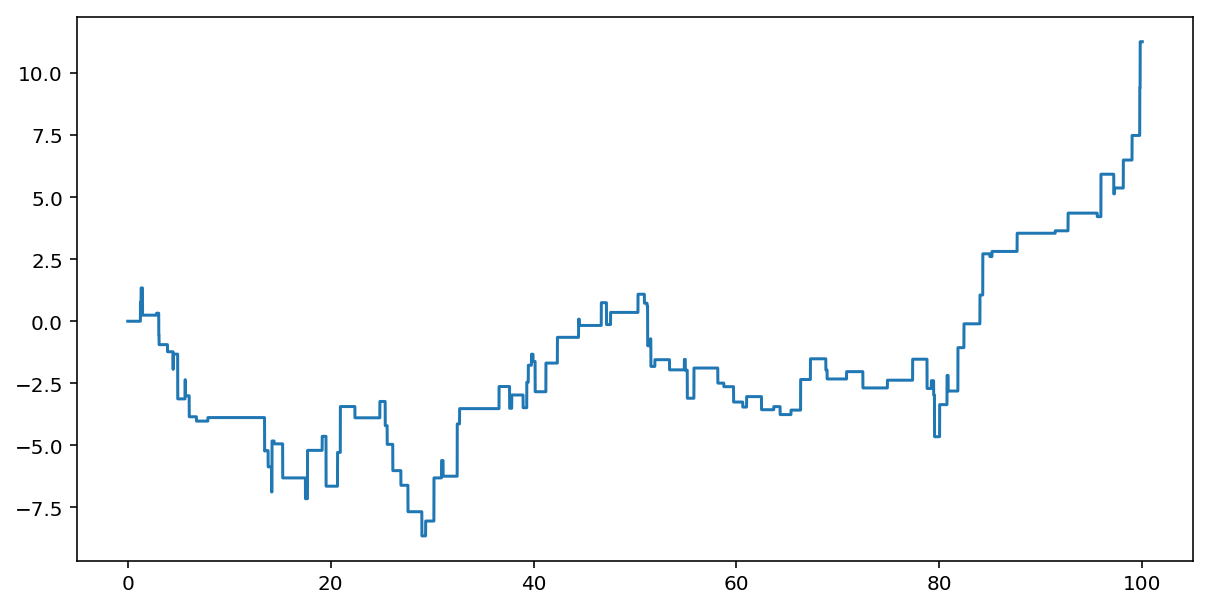

In [2]:
step = 100000
lam = 1
time_interval = 1e-3


param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
interval = np.random.randn(step)
param *= interval
x = np.cumsum(param)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
ax.plot(t, x)
plt.show()

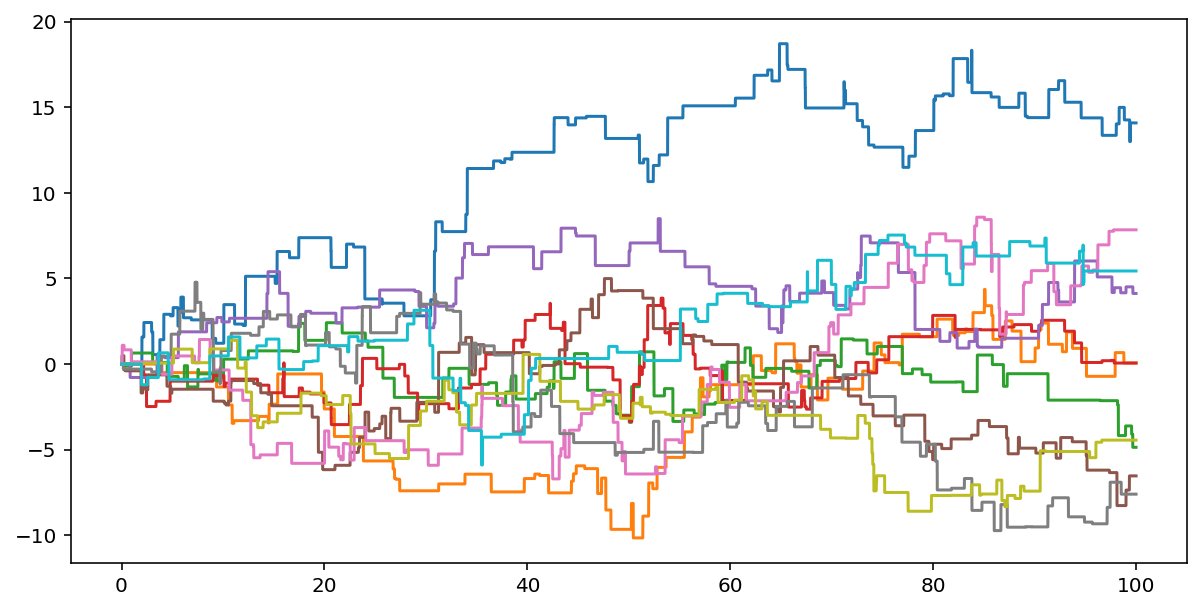

In [3]:
step = 100000
time_interval = 1e-3
lam = 1
num = 10


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.randn(step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    ax.plot(t, x)
plt.show()

### Example 2
Let $\xi$ is exponentially distributed with a parameter $\beta = 1.$

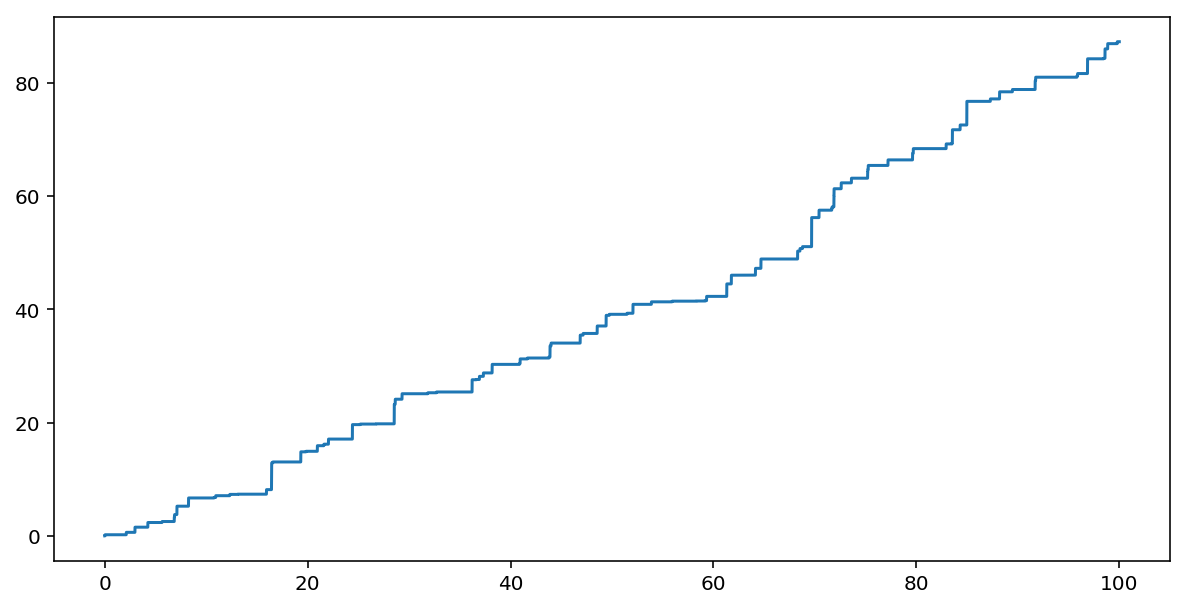

In [4]:
step = 100000
lam = 1
time_interval = 1e-3
beta = 1


param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
interval = np.random.exponential(1/beta, step)
param *= interval
x = np.cumsum(param)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
ax.plot(t, x)
plt.show()

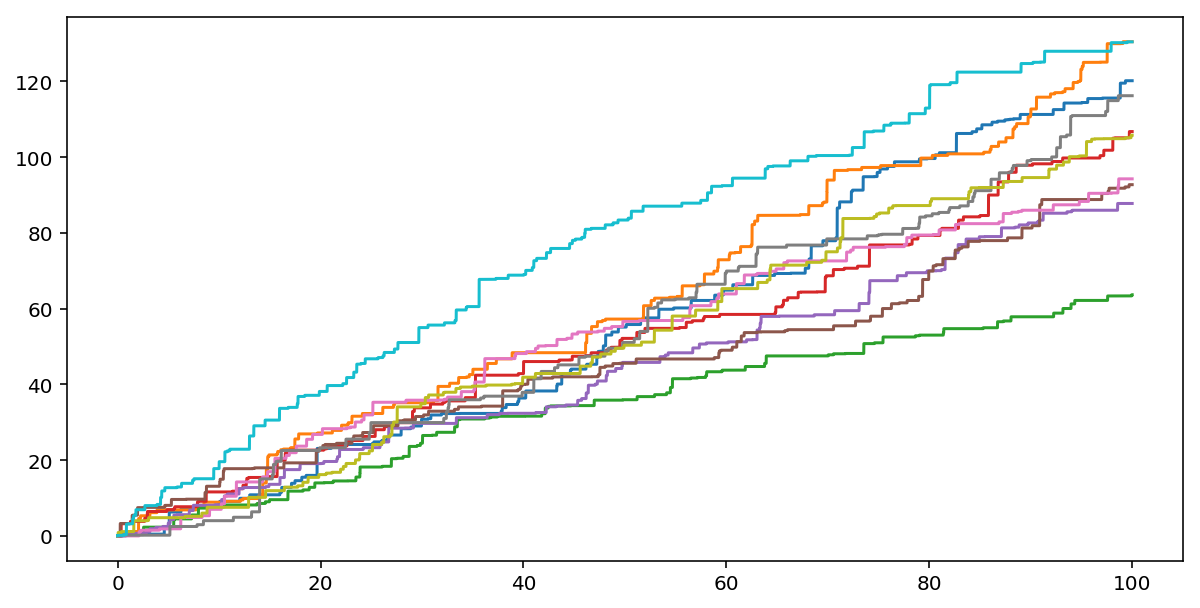

In [5]:
step = 100000
time_interval = 1e-3
lam = 1
beta = 1
num = 10


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    ax.plot(t, x)
plt.show()

# Cramér-Lundberg Risk Process
___

$$X(t) \, = \, x_0 + ct - \sum_{i=0}^{N(t)} \xi_i, \, \, c > 0, \,\,\xi > 0, \,\, t\ge 0. $$

$X(t)$ is a model of revenue of an insurance company.  
The company collects premiums at a certain rate $c$ from its customers and at times of Poisson process, a customer will make a claim causing the revenue to jump downwards.

Assume $x_0 = 100$, $c = 100$, and $\xi$ is exponentially distributed with a parameter $\beta = 1/100.$

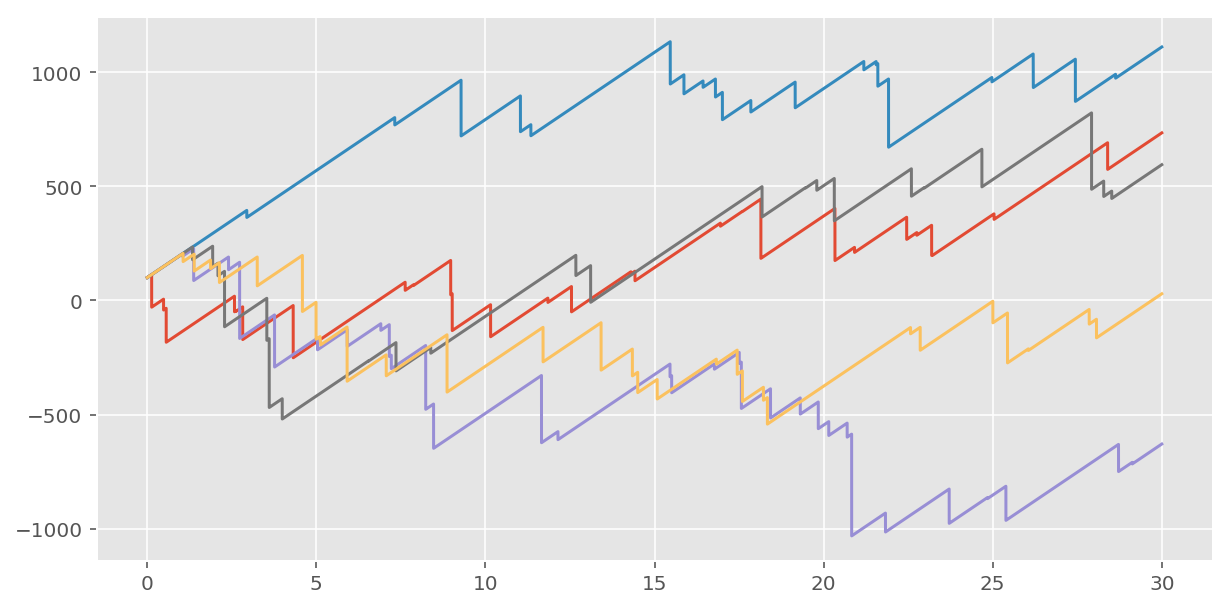

In [6]:
step = 30000
lam = 1
time_interval = 1e-3
x_0 = 100
c = 100
beta = 1/100
num = 5

plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    y = x_0 + c * t - x

    ax.plot(t, y)
plt.show()

# The M/G/1 queue
____

$$W(t) \, = \, \max (w + \sum_{i=0}^{N(t)}\xi_i - t , 0 )$$

Customers arrive at a service desk according to a Poisson process and join a queue.

Assume $w = 0$ and $\xi$ is exponentially distributed with $\beta = 1$. 

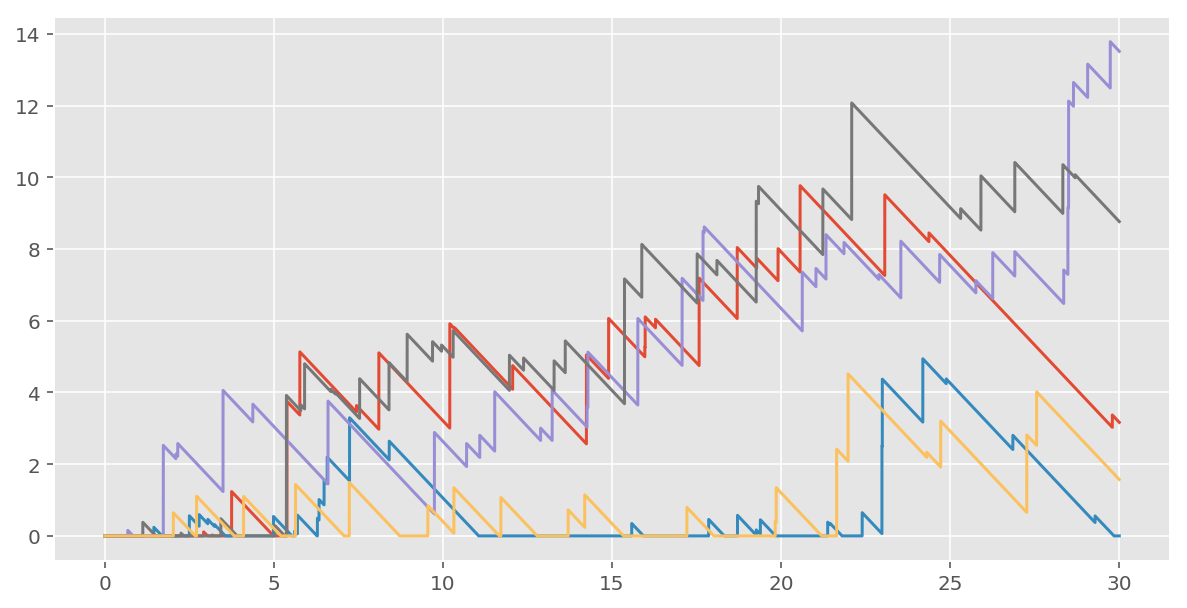

In [7]:
step = 30000
time_interval = 1e-3
lam = 1
beta = 1
num = 5


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    cache = 0
    y = []
    for x in param:
        cache += x - time_interval
        cache = max(cache, 0)
        y.append(cache)
    ax.plot(t, y)
plt.show()